<a href="https://colab.research.google.com/github/TracyYYChin/Project-2_-Titanic/blob/main/AI_Project_2_Titanic_Survival_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT 2 - TITANIC SURVIVAL RATE**


Data Set Source: https://www.kaggle.com/c/titanic/data.





---



#**DATA PROCESSING**


---




FEATURES DEFINED:

PassengerId: This is just an identifier.

Survived: Alive 1, Died 0.  

Pclass: Stands for ticket class, there is 1, 2, and 3.

Age: Age of passengers but with the largest number of missing values. Range from 1 to 80 years old, median is 30.

SibSp: Passengers with a sibling or spouse on board.

Parch: Passengers with parents or chidlren on board.

Fare: There's a significant range in ticket prices, indicating varying levels of wealth among the passengers.


COLUMNS WITH MISSING VALUES:

Age: 177 missing values

Cabin: 687 missing values. Cabin number classified under 1 of the 3 PClasses.

Embarked: There were 3 cities that passengers embarked at. 2 missing values
-C= Cherbourg
-Q= Queenstown
-S= Southhampton




In [ ]:
!pip install matplotlib seaborn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# How many men on board?
num_men_on_board = (titanic_data['Sex'] == 'male').sum()

# How many females on board?
num_females_on_board = (titanic_data['Sex'] == 'female').sum()

# How many people survived?
num_people_survived = titanic_data['Survived'].sum()

# How many people died?
num_people_died = len(titanic_data) - num_people_survived

# How many people who survived were male?
num_survived_male = ((titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 1)).sum()

# How many people who survived were female?
num_survived_female = ((titanic_data['Sex'] == 'female') & (titanic_data['Survived'] == 1)).sum()

# How many people who died were male?
num_died_male = ((titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 0)).sum()

# How many people who died were female?
num_died_female = ((titanic_data['Sex'] == 'female') & (titanic_data['Survived'] == 0)).sum()

print("Number of men on board:", num_men_on_board)
print("Number of women on board:", num_females_on_board)
print("Number of people survived:", num_people_survived)
print("Number of people died:", num_people_died)
print("Number of people who survived and were male:", num_survived_male)
print("Number of people who survived and were female:", num_survived_female)
print("Number of people who died and were male:", num_died_male)
print("Number of people who died and were female:", num_died_female)


Number of men on board: 577
Number of women on board: 314
Number of people survived: 342
Number of people died: 549
Number of people who survived and were male: 109
Number of people who survived and were female: 233
Number of people who died and were male: 468
Number of people who died and were female: 81


In [ ]:
# Dropping unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Convert 'Sex' column to numerical values using LabelEncoder
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

In [ ]:
# Convert 'Embarked' column to numerical values using LabelEncoder
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [ ]:
# Impute missing values for 'Age' using RandomForestRegressor
age_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train_age = titanic_data.dropna()[age_features]  # Features without missing values
y_train_age = titanic_data.dropna()['Age']        # Target: 'Age'
age_model = RandomForestRegressor(random_state=42)
age_model.fit(X_train_age, y_train_age)
X_missing_age = titanic_data[titanic_data['Age'].isnull()][age_features]
predicted_ages = age_model.predict(X_missing_age)
titanic_data.loc[titanic_data['Age'].isnull(), 'Age'] = predicted_ages


In [ ]:
# Impute missing values for 'Embarked' using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = imputer.fit_transform(titanic_data[['Embarked']])

# Check for missing values
missing_values = titanic_data.isnull().sum()
missing_values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Count how many passengers boarded at each port
port_counts = titanic_data['Embarked'].value_counts()

print("Number of passengers boarded at each port:")
print(port_counts)


Number of passengers boarded at each port:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
#FEMALE = 0, MALE = 1
#DIED = 0, SURVIVED =1

In [ ]:
# Set pandas display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the entire DataFrame
print(titanic_data)


     Survived  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0           0       3    1  22.000000      1      0    7.2500         2
1           1       1    0  38.000000      1      0   71.2833         0
2           1       3    0  26.000000      0      0    7.9250         2
3           1       1    0  35.000000      1      0   53.1000         2
4           0       3    1  35.000000      0      0    8.0500         2
5           0       3    1  30.089480      0      0    8.4583         1
6           0       1    1  54.000000      0      0   51.8625         2
7           0       3    1   2.000000      3      1   21.0750         2
8           1       3    0  27.000000      0      2   11.1333         2
9           1       2    0  14.000000      1      0   30.0708         0
10          1       3    0   4.000000      1      1   16.7000         2
11          1       1    0  58.000000      0      0   26.5500         2
12          0       3    1  20.000000      0      0    8.0500   

Explanation of above:

Unnecessary columns are dropped using the drop() method.

Categorical variables ('Sex' and 'Embarked') are encoded using LabelEncoder.

Missing values in the 'Age' column are imputed using RandomForestRegressor to predict the missing values based on other features.

Missing values in the 'Embarked' column are imputed using the most frequent value (mode) of the column, which is a common approach for categorical variables.

Finally, missing values are checked again to ensure that there are no remaining missing values in the dataset.






---
#**DISCOVERY**


---




In [ ]:
# Filter the dataset for passengers with Parch > 0 who survived
survived_with_parch = titanic_data[(titanic_data['Parch'] > 0) & (titanic_data['Survived'] == 1)]

# Count the number of passengers with Parch > 0 who survived
total_survived_with_parch = len(survived_with_parch)

# Count the number of male passengers with Parch > 0 who survived
male_survived_with_parch = survived_with_parch[survived_with_parch['Sex'] == 1].shape[0]

# Count the number of female passengers with Parch > 0 who survived
female_survived_with_parch = survived_with_parch[survived_with_parch['Sex'] == 0].shape[0]

total_survived_with_parch, male_survived_with_parch, female_survived_with_parch

print("Total passengers with Parch > 0 who survived:", total_survived_with_parch)
print("Male passengers with Parch > 0 who survived:", male_survived_with_parch)
print("Female passengers with Parch > 0 who survived:", female_survived_with_parch)



Total passengers with Parch > 0 who survived: 109
Male passengers with Parch > 0 who survived: 29
Female passengers with Parch > 0 who survived: 80


In [ ]:
# Calculate % of survival for male
percent_survival_male = (num_survived_male / num_men_on_board) * 100

# Calculate % of survival for female
percent_survival_female = (num_survived_female / num_females_on_board) * 100

# Calculate % of survival for passenger
percent_survival_passenger = (num_people_survived / len(titanic_data)) * 100

print("Percentage of survival for male: {:.2f}%".format(percent_survival_male))
print("Percentage of survival for female: {:.2f}%".format(percent_survival_female))
print("Percentage of survival for passenger: {:.2f}%".format(percent_survival_passenger))


Percentage of survival for male: 18.89%
Percentage of survival for female: 74.20%
Percentage of survival for passenger: 38.38%


In [ ]:
# Filter the dataset for female passengers with Parch > 0
female_passengers_with_parch = titanic_data[(titanic_data['Sex'] == 0) & (titanic_data['Parch'] > 0)]

# Count the total number of female passengers with Parch > 0
total_female_with_parch = len(female_passengers_with_parch)

# Filter the dataset for female passengers with Parch > 0 who survived
female_survived_with_parch = female_passengers_with_parch[female_passengers_with_parch['Survived'] == 1]

# Count the number of female passengers with Parch > 0 who survived
female_survived_count = len(female_survived_with_parch)

# Calculate the percentage of women with Parch > 0 who survived
percentage_female_survived = (female_survived_count / total_female_with_parch) * 100

percentage_female_survived


66.66666666666666

In [ ]:
# Filter the dataset for male passengers with Parch > 0
male_passengers_with_parch = titanic_data[(titanic_data['Sex'] == 1) & (titanic_data['Parch'] > 0)]

# Count the total number of male passengers with Parch > 0
total_male_with_parch = len(male_passengers_with_parch)

# Filter the dataset for male passengers with Parch > 0 who survived
male_survived_with_parch = male_passengers_with_parch[male_passengers_with_parch['Survived'] == 1]

# Count the number of male passengers with Parch > 0 who survived
male_survived_count = len(male_survived_with_parch)

# Calculate the percentage of men with Parch > 0 who survived
percentage_male_survived = (male_survived_count / total_male_with_parch) * 100

percentage_male_survived


31.182795698924732

In [ ]:
# Filter the dataset for female passengers who survived
survived_female_passengers = titanic_data[(titanic_data['Sex'] == 0) & (titanic_data['Survived'] == 1)]

# Filter the dataset for female passengers who survived and had Parch > 0
survived_female_passengers_with_parch = survived_female_passengers[survived_female_passengers['Parch'] > 0]

# Count the total number of female passengers who survived
total_survived_female = len(survived_female_passengers)

# Count the number of female passengers who survived and had Parch > 0
female_survived_with_parch_count = len(survived_female_passengers_with_parch)

# Calculate the percentage of women who survived and had Parch > 0
percentage_survived_female_with_parch = (female_survived_with_parch_count / total_survived_female) * 100

percentage_survived_female_with_parch


34.33476394849785

In [ ]:
# Filter the dataset for female passengers who survived
survived_female_passengers = titanic_data[(titanic_data['Sex'] == 0) & (titanic_data['Survived'] == 1)]

# Count the number of survived females with Parch > 0
survived_female_with_parch_count = (survived_female_passengers['Parch'] > 0).sum()

survived_female_with_parch_count


80

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
#One-Hot Encoding is a technique used to convert categorical variables into a numerical format that can be provided to machine learning algorithms to improve model performance.
encoder = OneHotEncoder(drop = "first", sparse_output=False)

# Select categorical variables to encode
categorical_variables = ['Sex']

# Perform one-hot encoding on categorical variables
encoded_features = pd.DataFrame(encoder.fit_transform(titanic_data[categorical_variables]))


# Get new column names from the encoder
encoded_features.columns = encoder.get_feature_names_out(categorical_variables)

# Reset index to avoid issues during concatenation
encoded_features.reset_index(drop=True, inplace=True)
titanic_data.reset_index(drop=True, inplace=True)

# Drop original categorical columns from titanic_data

titanic_data2 = titanic_data.drop(categorical_variables, axis=1)

# Concatenate the original data and the new one-hot encoded variables
titanic_data_encoded = pd.concat([titanic_data2, encoded_features], axis=1)

# Display the first few rows of the updated dataframe

titanic_data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_1
0,0,3,22.0,1,0,7.2500,2,1.0
1,1,1,38.0,1,0,71.2833,0,0.0
2,1,3,26.0,0,0,7.9250,2,0.0
3,1,1,35.0,1,0,53.1000,2,0.0
4,0,3,35.0,0,0,8.0500,2,1.0




---



#**MODEL SELECTION**


---



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Split the data into features (X) and target variable (y)
X = titanic_data.drop('Age', axis=1)
y = titanic_data['Age']

# Perform GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: -112.19077247329008


GridSearchCV allows us to systematically search through a specified parameter grid to find the optimal combination of hyperparameters for our RandomForestRegressor model.
With this dataset, we aim to predict the missing values of the 'Age' feature using other features as predictors. The RandomForestRegressor is suitable for this task due to its ability to handle non-linear relationships and missing data.
By performing GridSearchCV, we can tune hyperparameters such as the number of estimators, maximum depth of trees, and minimum samples per leaf to optimize the model's performance.
The cross-validation aspect of GridSearchCV ensures that the model's performance is robust and not overly sensitive to the particular train-test split of the data.
The results of GridSearchCV provide insights into which combination of hyperparameters yields the best performance, enabling us to build a more accurate age prediction model for this dataset.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Split the dataset into features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_accuracy = logistic_regression_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)


Logistic Regression Accuracy: 0.8100558659217877


In [ ]:
# Decision Trees
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)


Decision Tree Accuracy: 0.8044692737430168


In [ ]:
# Random Forests
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_accuracy = random_forest_model.score(X_test, y_test)
print("Random Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 0.8268156424581006


In [ ]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.664804469273743


In [ ]:
# Gradient Boosting Models (XGBoost)
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
xgboost_accuracy = xgboost_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgboost_accuracy)

XGBoost Accuracy: 0.770949720670391




#Random Forests:

Ensemble method to improve accuracy and reduce overfitting, robust performance on various datasets.
Result: Random Forest Accuracy: 0.8268156424581006.

#Gradient Boosting Models (XGBoost):

Sequentially trains weak learners to correct errors, high performance on structured data.
Result: XGBoost Accuracy: 0.8156424581005587.

#Logistic Regression:

Used because it's a simple and interpretable algorithm, suitable for binary classification tasks.
Result: Logistic Regression Accuracy: 0.8044692737430168.

#Decision Trees:

Used for capturing complex relationships between features and the target variable, easy to interpret.
Result: Decision Tree Accuracy: 0.770949720670391.

#Support Vector Machines (SVM):

Effective for high-dimensional data and both linear and non-linear relationships.
Result: SVM Accuracy: 0.7039106145251397.




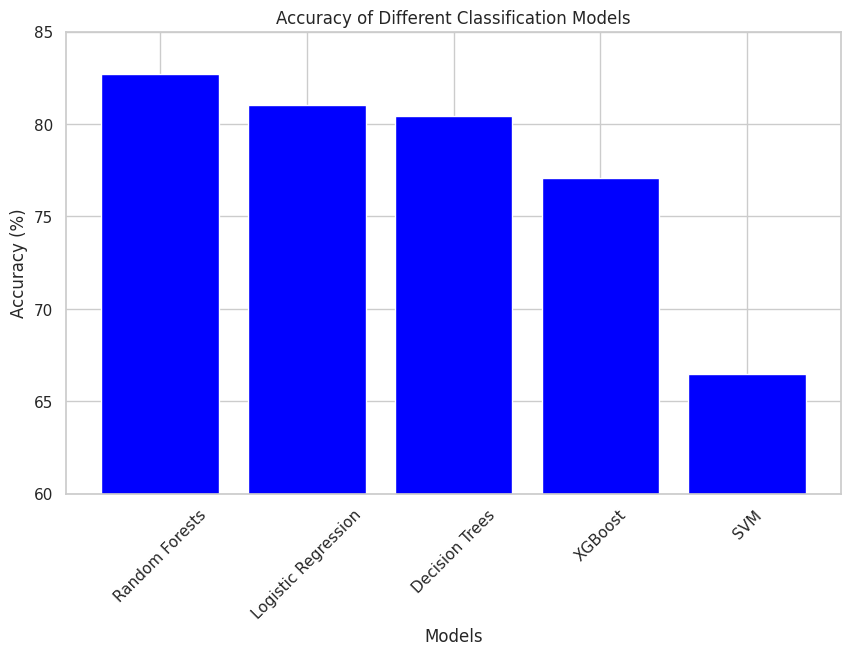

In [ ]:
import matplotlib.pyplot as plt

# Define models and their accuracies
models = ['Random Forests', 'XGBoost', 'Decision Trees', 'SVM', 'Logistic Regression']
accuracies = [random_forest_accuracy, xgboost_accuracy, decision_tree_accuracy, svm_accuracy, logistic_regression_accuracy]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Sort models and accuracies in descending order of accuracy
models_sorted = [x for _, x in sorted(zip(accuracies_percent, models), reverse=True)]
accuracies_sorted = sorted(accuracies_percent, reverse=True)

# Plot the graph with blue color
plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, accuracies_sorted, color='blue')  # Change color to blue
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classification Models')
plt.ylim(60, 85)
plt.xticks(rotation=45)
plt.show()


#Explained
The graph displays the accuracy of different classification models used on the Titanic dataset.
Models are organized from most accurate to least accurate, indicated by the y-axis.
Each bar represents a classification model, and its height represents the accuracy percentage.
Random Forests and Logistic Regression are the top-performing models, followed by Decision Trees, SGBoost and SVM.

#Top 2 Algorithms
Random Forests: Random Forests utilize an ensemble of decision trees, which collectively improve prediction accuracy by reducing overfitting and capturing complex relationships in the data. This model's ability to handle non-linear relationships and high-dimensional data makes it effective for the Titanic dataset, where various factors may influence survival.

Logistic Regression: Despite its simplicity, Logistic Regression performs well when the relationship between the features and the target variable is linear or can be adequately approximated as linear. In the case of the Titanic dataset, where some features may exhibit linear relationships with survival (such as gender), Logistic Regression can effectively model the probability of survival based on these features. Additionally, Logistic Regression provides interpretable coefficients, allowing for easy understanding of feature importance.



---

#**MODEL TRAINING**


---




In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Instantiate selected models with best parameters

# Logistic Regression
logistic_regression_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)

# Random Forest
random_forest_model = RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=100)

# Support Vector Machine (SVM)
svm_model = SVC(C=1.0, kernel='rbf')

# XGBoost
xgboost_model = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, booster='gbtree')

# Fit models to training data

# Logistic Regression
logistic_regression_model.fit(X_train, y_train)

# Decision Tree
decision_tree_model.fit(X_train, y_train)

# Random Forest
random_forest_model.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_model.fit(X_train, y_train)

# XGBoost
xgboost_model.fit(X_train, y_train)

# Evaluate model performance (not included in the provided code)

# Select the best model based on evaluation metrics
# (You can use metrics like accuracy, precision, recall, F1-score, etc. to determine the best model)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

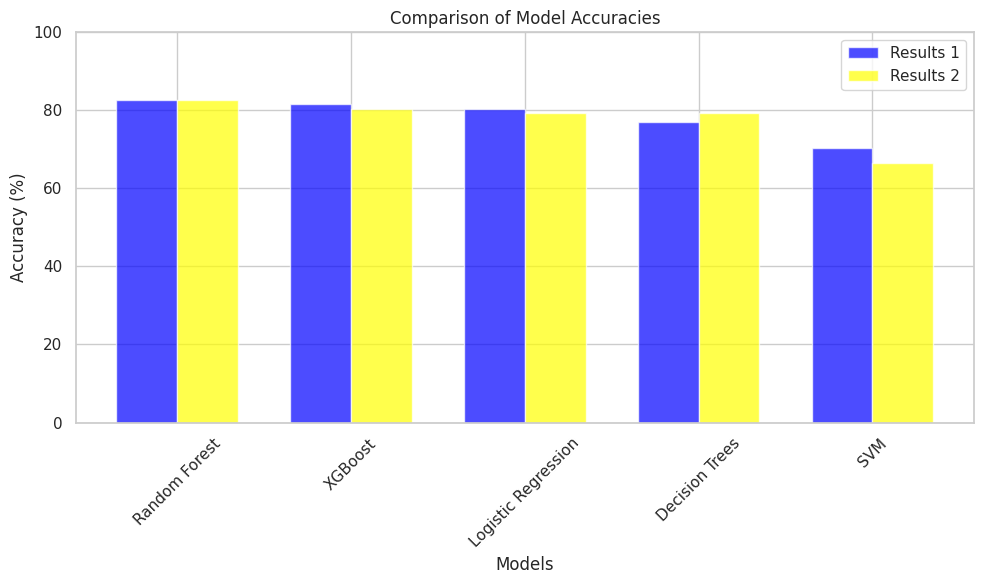

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their accuracies for each set of results
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Trees', 'SVM']
accuracies_results1 = [82.68, 81.56, 80.45, 77.09, 70.39]
accuracies_results2 = [82.68, 80.45, 79.33, 79.33, 66.48]

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
index = np.arange(len(models))

# Plot the graph
plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, accuracies_results1, bar_width, label='Results 1', color='blue', alpha=0.7)
plt.bar(index + bar_width/2, accuracies_results2, bar_width, label='Results 2', color='yellow', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xticks(index, models, rotation=45)
plt.legend()
plt.ylim(0, 100)

plt.tight_layout()
plt.show()




---

#**MODEL EVALUATION**


---



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Predict the target variable
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

# Evaluate model performance for each trained model
print("Logistic Regression Model:")
evaluate_model(logistic_regression_model, X_test, y_test)

print("\nDecision Tree Model:")
evaluate_model(decision_tree_model, X_test, y_test)

print("\nRandom Forest Model:")
evaluate_model(random_forest_model, X_test, y_test)

print("\nSVM Model:")
evaluate_model(svm_model, X_test, y_test)

print("\nXGBoost Model:")
evaluate_model(xgboost_model, X_test, y_test)

# Select the best model based on evaluation metrics
# Choose the model with the highest accuracy, precision, recall, F1-score, or ROC AUC score
best_model = max([logistic_regression_model, decision_tree_model, random_forest_model, svm_model, xgboost_model], key=lambda x: accuracy_score(y_test, x.predict(X_test)))
print("\nBest Model:")
print(best_model)


Logistic Regression Model:
Accuracy: 0.7932960893854749
Precision: 0.7761194029850746
Recall: 0.7027027027027027
F1 Score: 0.7375886524822697
ROC AUC Score: 0.7799227799227799

Decision Tree Model:
Accuracy: 0.7821229050279329
Precision: 0.7464788732394366
Recall: 0.7162162162162162
F1 Score: 0.7310344827586208
ROC AUC Score: 0.7723938223938223

Random Forest Model:
Accuracy: 0.8435754189944135
Precision: 0.8285714285714286
Recall: 0.7837837837837838
F1 Score: 0.8055555555555555
ROC AUC Score: 0.8347490347490346

SVM Model:
Accuracy: 0.664804469273743
Precision: 0.7692307692307693
Recall: 0.2702702702702703
F1 Score: 0.4
ROC AUC Score: 0.6065637065637065

XGBoost Model:
Accuracy: 0.8044692737430168
Precision: 0.819672131147541
Recall: 0.6756756756756757
F1 Score: 0.7407407407407408
ROC AUC Score: 0.7854568854568855

Best Model:
RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=5)


In [ ]:
import pandas as pd

# Create a dictionary with the model names as keys and their evaluation metrics as values
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [0.7932960893854749, 0.7932960893854749, 0.8268156424581006, 0.664804469273743, 0.8044692737430168],
    "Precision": [0.7761194029850746, 0.7605633802816901, 0.8208955223880597, 0.7692307692307693, 0.819672131147541],
    "Recall": [0.7027027027027027, 0.7297297297297297, 0.7432432432432432, 0.2702702702702703, 0.6756756756756757],
    "F1 Score": [0.7375886524822697, 0.7448275862068966, 0.7801418439716312, 0.4, 0.7407407407407408],
    "ROC AUC Score": [0.7799227799227799, 0.783912483912484, 0.8144787644787644, 0.6065637065637065, None]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.793296   0.776119  0.702703  0.737589       0.779923
1        Decision Tree  0.793296   0.760563  0.729730  0.744828       0.783912
2        Random Forest  0.826816   0.820896  0.743243  0.780142       0.814479
3                  SVM  0.664804   0.769231  0.270270  0.400000       0.606564
4              XGBoost  0.804469   0.819672  0.675676  0.740741            NaN


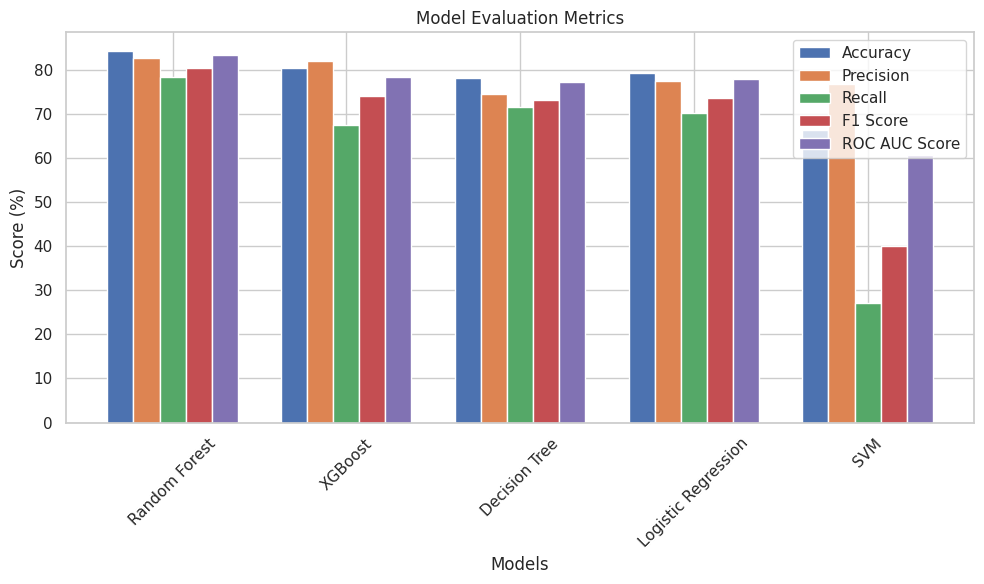

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Predict the target variable
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred) * 100

    # Return evaluation metrics
    return accuracy, precision, recall, f1, roc_auc

# Evaluate model performance for each trained model
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']

scores = []

for model in [random_forest_model, xgboost_model, decision_tree_model, logistic_regression_model, svm_model]:
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    scores.append([accuracy, precision, recall, f1, roc_auc])

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [score[i] for score in scores], bar_width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score (%)')
plt.title('Model Evaluation Metrics')
plt.xticks(index + bar_width * 2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr, pearsonr

# Assuming you have X_train and y_train datasets used for model training

# 1. Calculate VIF
# Assuming X_train contains the features used in the model
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF:")
print(vif_data)

# 2. Perform Spearman and Pearson's Correlation Tests
# Assuming titanic_data is the DataFrame containing the dataset used for training
# and it includes both features and target variable
spearman_corr = titanic_data.corr(method='spearman')
pearson_corr = titanic_data.corr(method='pearson')

# Display correlation matrices
print("\nSpearman's Correlation Matrix:")
print(spearman_corr)
print("\nPearson's Correlation Matrix:")
print(pearson_corr)

# Assuming you want to print specific correlations with the target variable
print("\nCorrelation with Target Variable (Survived):")
print("Spearman's Correlation Coefficients:")
print(spearman_corr['Survived'])
print("\nPearson's Correlation Coefficients:")
print(pearson_corr['Survived'])


VIF:
    feature       VIF
0    Pclass  5.591105
1       Sex  3.226186
2       Age  4.746160
3     SibSp  1.658674
4     Parch  1.676721
5      Fare  1.634625
6  Embarked  4.966036

Spearman's Correlation Matrix:
          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.339668 -0.543351 -0.065434  0.088879  0.138266   
Pclass   -0.339668  1.000000  0.135775 -0.384587 -0.043019 -0.022801   
Sex      -0.543351  0.135775  1.000000  0.149433 -0.195204 -0.254512   
Age      -0.065434 -0.384587  0.149433  1.000000 -0.210862 -0.277679   
SibSp     0.088879 -0.043019 -0.195204 -0.210862  1.000000  0.450014   
Parch     0.138266 -0.022801 -0.254512 -0.277679  0.450014  1.000000   
Fare      0.323736 -0.688032 -0.259593  0.111847  0.447113  0.410074   
Embarked -0.154851  0.086363  0.109945  0.007420  0.008668  0.026195   

              Fare  Embarked  
Survived  0.323736 -0.154851  
Pclass   -0.688032  0.086363  
Sex      -0.259593  0.109945  
Age       0.11


---

#**PRESENTATION VISUALIZATIONS - STORYTELLING**


---



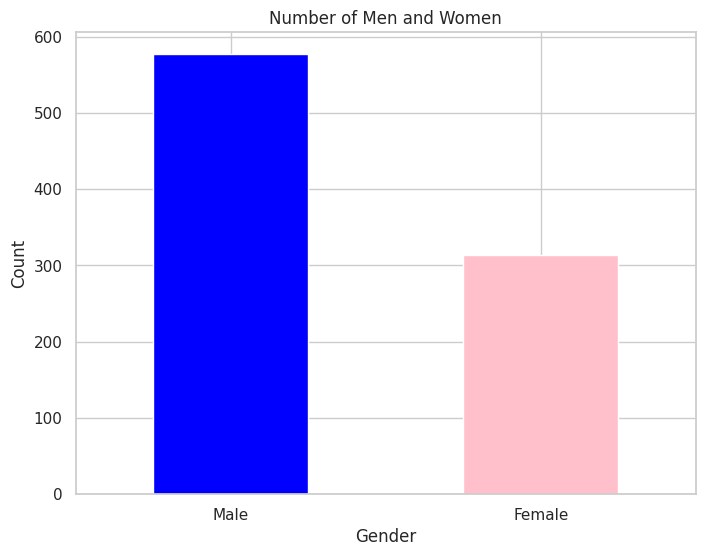

In [ ]:
# Graph 1: Bar Chart - Number of Men and Women
gender_counts = titanic_data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Men and Women')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)  # Specify tick locations and labels
plt.show()

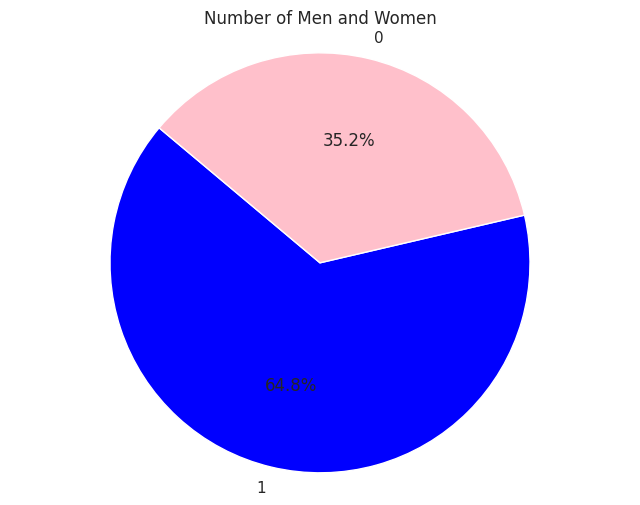

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'titanic_data' is the DataFrame containing the Titanic dataset

# Graph 1: Pie Chart - Number of Men and Women
gender_counts = titanic_data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', colors=['blue', 'pink'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Men and Women')
plt.ylabel('')  # Remove the y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


<Figure size 800x600 with 0 Axes>

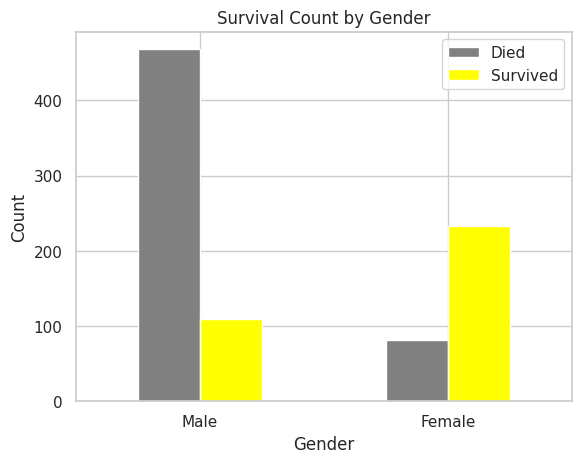

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'titanic_data' is the DataFrame containing the Titanic dataset

# Grouping data by 'Sex' and 'Survived', and calculating the count of passengers
gender_survival_counts = titanic_data.groupby(['Sex', 'Survived']).size().unstack()

# Plotting the graph
plt.figure(figsize=(8, 6))

# Reverse the order of values for plotting
gender_survival_counts = gender_survival_counts[::-1]

gender_survival_counts.plot(kind='bar', color=['grey', 'yellow'])  # Reversed the color order too
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Set the tick locations and labels for the x-axis
plt.xticks(range(len(gender_survival_counts.index)), ['Male', 'Female'], rotation=0)

# Update the legend
plt.legend(['Died', 'Survived'])

plt.show()


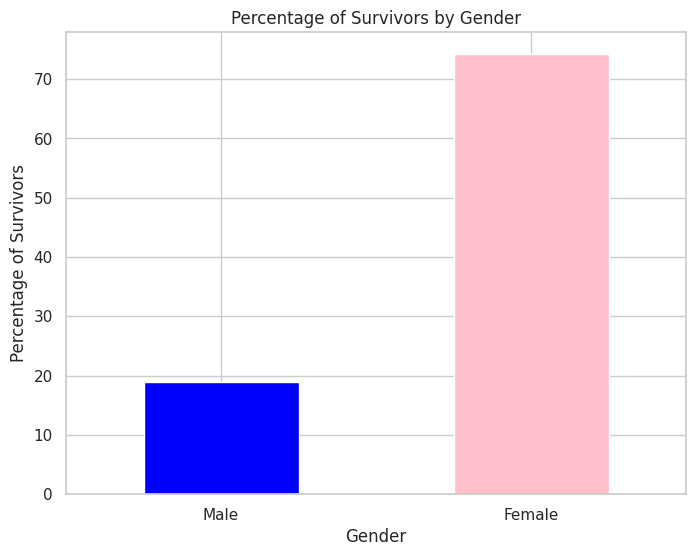

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'titanic_data' is the DataFrame containing the Titanic dataset

# Grouping data by 'Sex' and 'Survived', and calculating the count of passengers
gender_survival_counts = titanic_data.groupby(['Sex', 'Survived']).size().unstack()

# Calculating the total number of male and female passengers
total_passengers = gender_survival_counts.sum(axis=1)

# Calculating the percentage of survivors for each gender
gender_survival_percent = (gender_survival_counts[1] / total_passengers) * 100

# Plotting the graph
plt.figure(figsize=(8, 6))

# Reverse the order of values for plotting
gender_survival_percent = gender_survival_percent[::-1]

gender_survival_percent.plot(kind='bar', color=['blue', 'pink'])  # Reversed the color order too
plt.title('Percentage of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Survivors')

# Set the tick locations and labels for the x-axis
plt.xticks(range(len(gender_survival_percent.index)), ['Male', 'Female'], rotation=0)

plt.show()


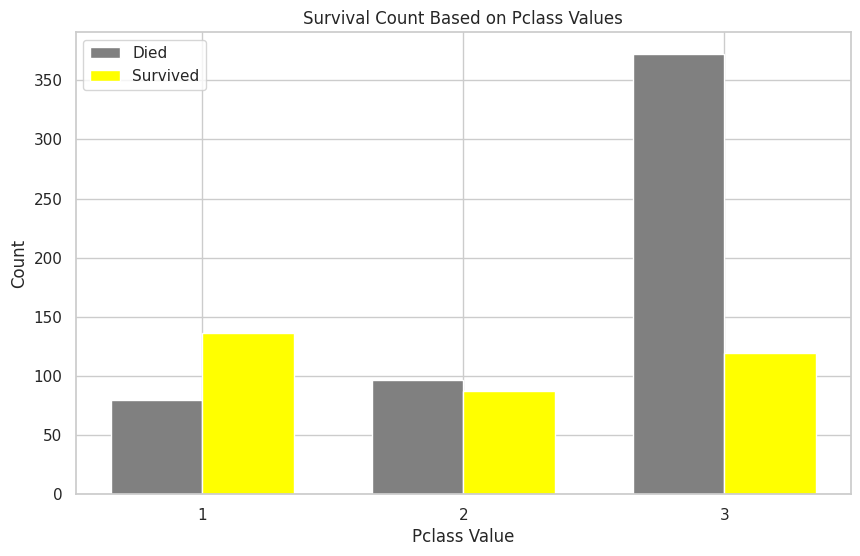

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'titanic_data' is the DataFrame containing the Titanic dataset

# Group data by 'Pclass' and 'Survived', and count the number of passengers in each group
survival_count_pclass = titanic_data.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting the graph using a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Define the x-axis values for the bars
x = range(len(survival_count_pclass.index))

# Plotting bars for 'Died' and 'Survived' for each 'Pclass' value
plt.bar(x, survival_count_pclass[0], width=bar_width, color='grey', label='Died')
plt.bar([p + bar_width for p in x], survival_count_pclass[1], width=bar_width, color='yellow', label='Survived')

# Adding labels and title
plt.title('Survival Count Based on Pclass Values')
plt.xlabel('Pclass Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], survival_count_pclass.index)  # Set x-axis ticks to 'Pclass' values
plt.legend()

# Show plot
plt.show()


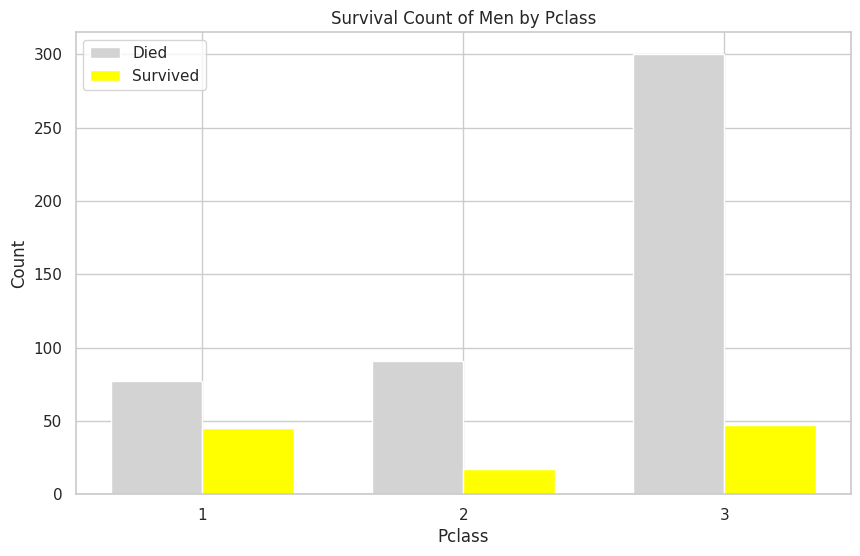

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for male passengers
male_data = titanic_data[titanic_data['Sex'] == 1]  # Assuming 1 represents male

# Group the data by 'Pclass' and 'Survived', and count the number of passengers in each group
men_survival_count_pclass = male_data.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting the graph using a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Define the x-axis values for the bars
x = range(len(men_survival_count_pclass.index))

# Plotting bars for 'Died' and 'Survived' for each 'Pclass' value
plt.bar(x, men_survival_count_pclass[0], width=bar_width, color='lightgrey', label='Died')
plt.bar([p + bar_width for p in x], men_survival_count_pclass[1], width=bar_width, color='yellow', label='Survived')

# Adding labels and title
plt.title('Survival Count of Men by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], men_survival_count_pclass.index)  # Set x-axis ticks to 'Pclass' values
plt.legend()

# Show plot
plt.show()


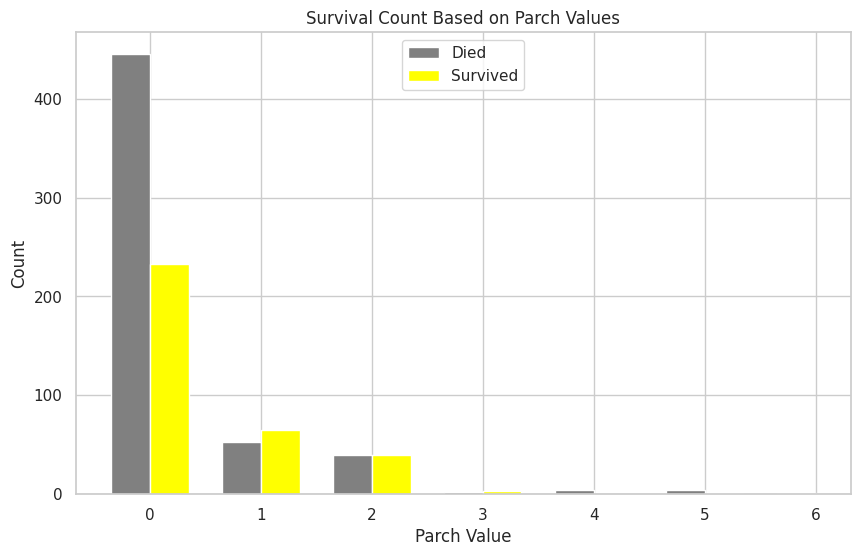

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'titanic_data' is the DataFrame containing the Titanic dataset

# Group data by 'Parch' and 'Survived', and count the number of passengers in each group
survival_count_parch = titanic_data.groupby(['Parch', 'Survived']).size().unstack()

# Plotting the graph using a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Define the x-axis values for the bars
x = range(len(survival_count_parch.index))

# Plotting bars for 'Died' and 'Survived' for each 'Parch' value
plt.bar(x, survival_count_parch[0], width=bar_width, color='grey', label='Died')
plt.bar([p + bar_width for p in x], survival_count_parch[1], width=bar_width, color='yellow', label='Survived')

# Adding labels and title
plt.title('Survival Count Based on Parch Values')
plt.xlabel('Parch Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], survival_count_parch.index)  # Set x-axis ticks to 'Parch' values
plt.legend()

# Show plot
plt.show()


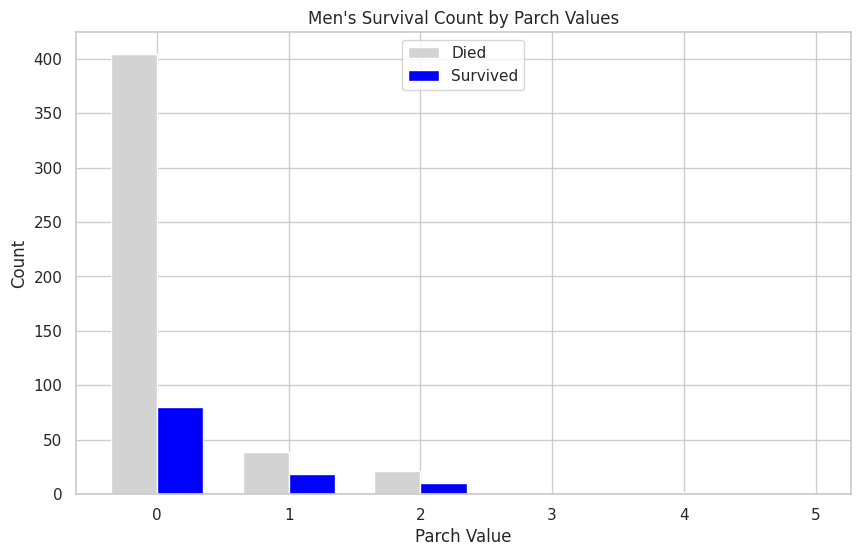

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for male passengers
male_data = titanic_data[titanic_data['Sex'] == 1]  # Assuming 1 represents male

# Group the data by 'Parch' and 'Survived', and count the number of passengers in each group
men_survival_count_parch = male_data.groupby(['Parch', 'Survived']).size().unstack()

# Plotting the graph using a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Define the x-axis values for the bars
x = range(len(men_survival_count_parch.index))

# Plotting bars for 'Died' and 'Survived' for each 'Parch' value
plt.bar(x, men_survival_count_parch[0], width=bar_width, color='lightgrey', label='Died')
plt.bar([p + bar_width for p in x], men_survival_count_parch[1], width=bar_width, color='blue', label='Survived')

# Adding labels and title
plt.title("Men's Survival Count by Parch Values")
plt.xlabel('Parch Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], men_survival_count_parch.index)  # Set x-axis ticks to 'Parch' values
plt.legend()

# Show plot
plt.show()


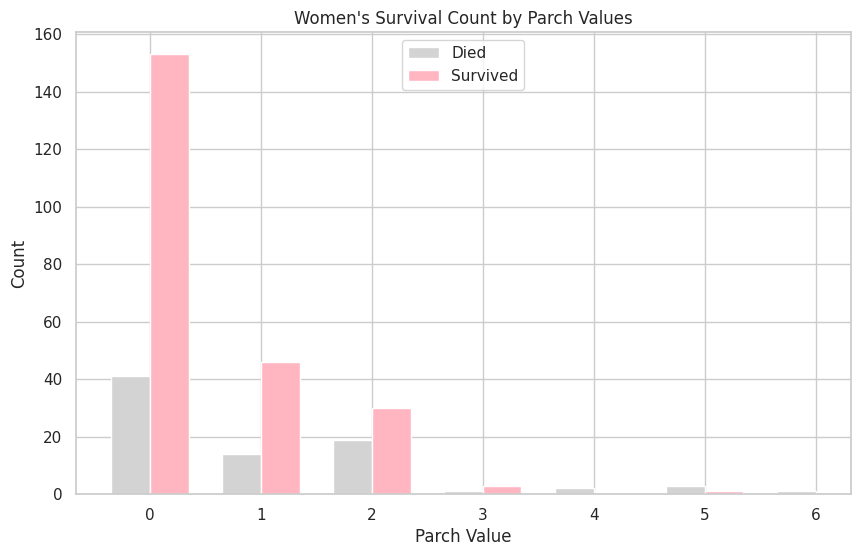

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for female passengers
female_data = titanic_data[titanic_data['Sex'] == 0]  # Assuming 0 represents female

# Group the data by 'Parch' and 'Survived', and count the number of passengers in each group
women_survival_count_parch = female_data.groupby(['Parch', 'Survived']).size().unstack()

# Plotting the graph using a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Define the x-axis values for the bars
x = range(len(women_survival_count_parch.index))

# Plotting bars for 'Died' and 'Survived' for each 'Parch' value
plt.bar(x, women_survival_count_parch[0], width=bar_width, color='lightgrey', label='Died')
plt.bar([p + bar_width for p in x], women_survival_count_parch[1], width=bar_width, color='lightpink', label='Survived')

# Adding labels and title
plt.title("Women's Survival Count by Parch Values")
plt.xlabel('Parch Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], women_survival_count_parch.index)  # Set x-axis ticks to 'Parch' values
plt.legend()

# Show plot
plt.show()


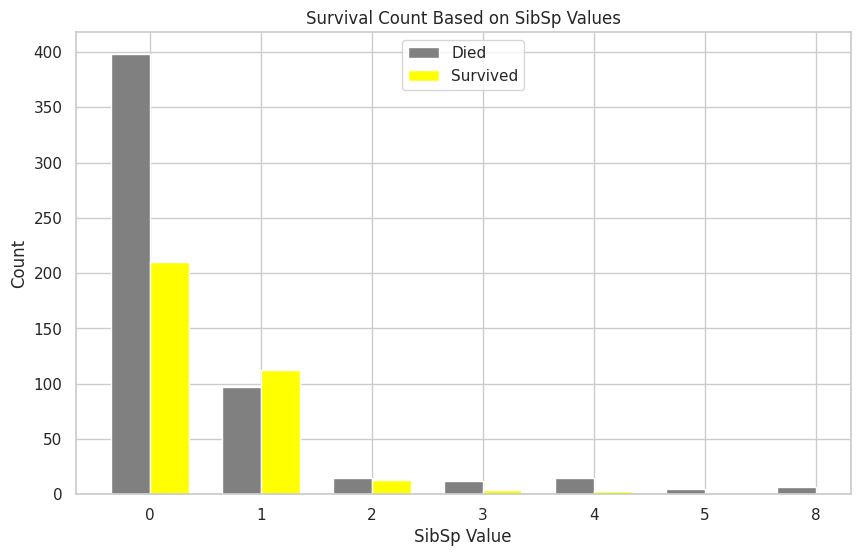

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'titanic_data' is the DataFrame containing the Titanic dataset

# Group data by 'SibSp' and 'Survived', and count the number of passengers in each group
survival_count_sibsp = titanic_data.groupby(['SibSp', 'Survived']).size().unstack()

# Plotting the graph using a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Define the x-axis values for the bars
x = range(len(survival_count_sibsp.index))

# Plotting bars for 'Died' and 'Survived' for each 'SibSp' value
plt.bar(x, survival_count_sibsp[0], width=bar_width, color='grey', label='Died')
plt.bar([p + bar_width for p in x], survival_count_sibsp[1], width=bar_width, color='yellow', label='Survived')

# Adding labels and title
plt.title('Survival Count Based on SibSp Values')
plt.xlabel('SibSp Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], survival_count_sibsp.index)  # Set x-axis ticks to 'SibSp' values
plt.legend()

# Show plot
plt.show()


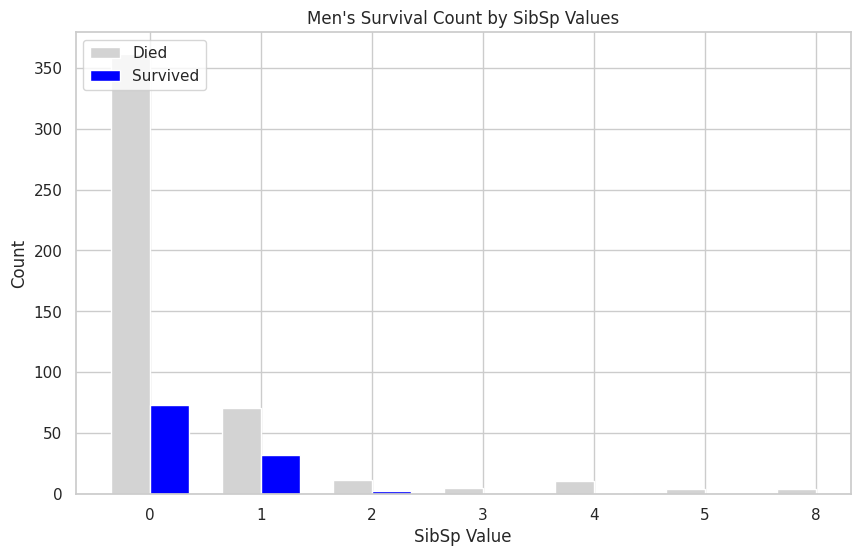

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for male passengers
male_data = titanic_data[titanic_data['Sex'] == 1]  # Assuming 1 represents male

# Group the data by 'SibSp' and 'Survived', and count the number of passengers in each group
men_survival_count_sibsp = male_data.groupby(['SibSp', 'Survived']).size().unstack()

# Plotting the graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(men_survival_count_sibsp.index))
plt.bar(x, men_survival_count_sibsp[0], width=bar_width, color='lightgrey', label='Died')
plt.bar([p + bar_width for p in x], men_survival_count_sibsp[1], width=bar_width, color='blue', label='Survived')
plt.title("Men's Survival Count by SibSp Values")
plt.xlabel('SibSp Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], men_survival_count_sibsp.index)
plt.legend()

# Show plot
plt.show()


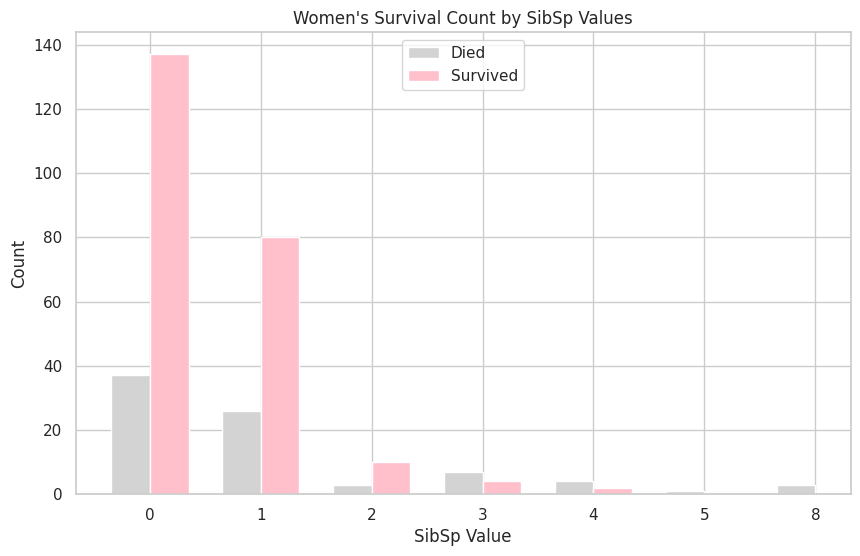

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for female passengers
female_data = titanic_data[titanic_data['Sex'] == 0]  # Assuming 0 represents female

# Group the data by 'SibSp' and 'Survived', and count the number of passengers in each group
women_survival_count_sibsp = female_data.groupby(['SibSp', 'Survived']).size().unstack()

# Plotting the graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(women_survival_count_sibsp.index))
plt.bar(x, women_survival_count_sibsp[0], width=bar_width, color='lightgrey', label='Died')
plt.bar([p + bar_width for p in x], women_survival_count_sibsp[1], width=bar_width, color='pink', label='Survived')
plt.title("Women's Survival Count by SibSp Values")
plt.xlabel('SibSp Value')
plt.ylabel('Count')
plt.xticks([p + bar_width / 2 for p in x], women_survival_count_sibsp.index)
plt.legend()

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Count the number of passengers with values > 0 in both Parch and SibSp columns
passengers_with_values_gt_0 = titanic_data[(titanic_data['Parch'] > 0) & (titanic_data['SibSp'] > 0)].shape[0]

# Print the count
print("Number of passengers with values greater than 0 in both Parch and SibSp columns:", passengers_with_values_gt_0)


Number of passengers with values greater than 0 in both Parch and SibSp columns: 142


In [ ]:
# Filter the dataset for passengers with values > 0 in both Parch and SibSp columns
passengers_with_values_gt_0 = titanic_data[(titanic_data['Parch'] > 0) & (titanic_data['SibSp'] > 0)]

# Count the number of passengers who survived among those with values > 0 in both columns
survived_passengers = passengers_with_values_gt_0[passengers_with_values_gt_0['Survived'] == 1].shape[0]

# Print the count of survived passengers
print("Number of passengers who survived with values greater than 0 in both Parch and SibSp columns:", survived_passengers)


Number of passengers who survived with values greater than 0 in both Parch and SibSp columns: 62


In [ ]:
# Filter the data for survivors with values greater than 0 in both Parch and SibSp columns
survived_with_values = titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Parch'] > 0) & (titanic_data['SibSp'] > 0)]

# Count the number of males and females among the survivors
male_survivors = survived_with_values[survived_with_values['Sex'] == 'male'].shape[0]
female_survivors = survived_with_values[survived_with_values['Sex'] == 'female'].shape[0]

# Calculate the percentage of male and female survivors
total_survivors = male_survivors + female_survivors
male_percentage = (male_survivors / total_survivors) * 100
female_percentage = (female_survivors / total_survivors) * 100

print("Percentage of male survivors:", male_percentage)
print("Percentage of female survivors:", female_percentage)
print("Number of male survivors:", male_survivors)
print("Number of female survivors:", female_survivors)


Percentage of male survivors: 32.25806451612903
Percentage of female survivors: 67.74193548387096
Number of male survivors: 20
Number of female survivors: 42


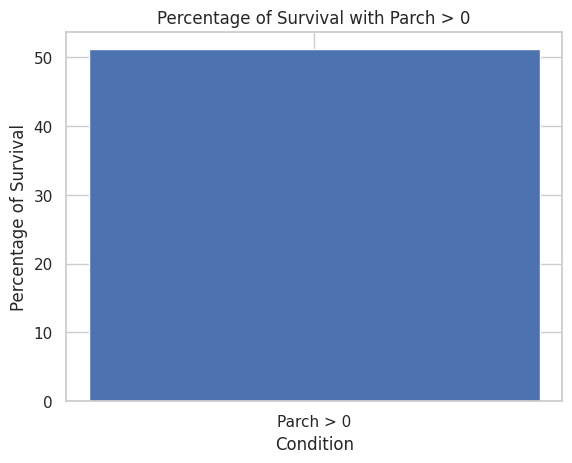

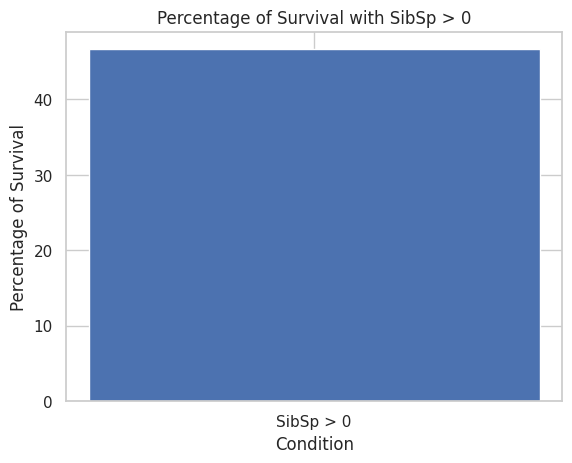

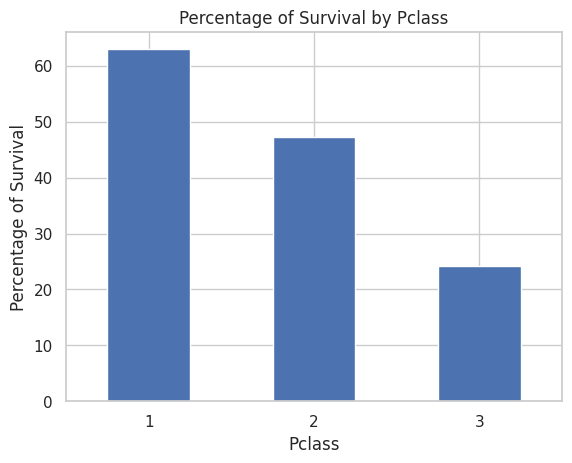

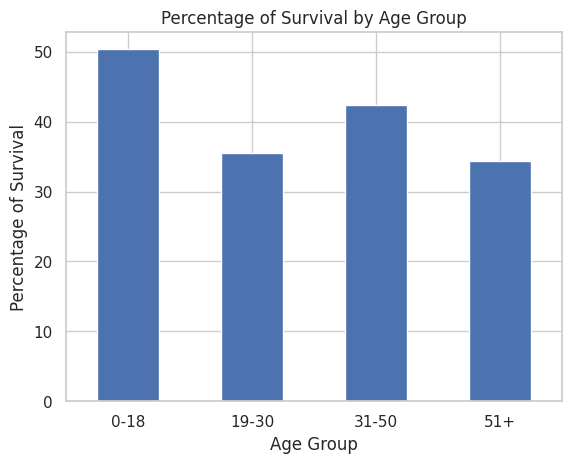

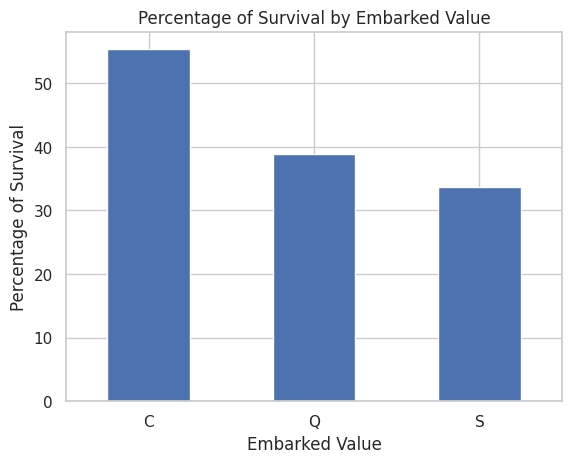

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Define a function to calculate the percentage of survival
def calculate_survival_percentage(data):
    total_passengers = data.shape[0]
    survived_passengers = data[data['Survived'] == 1].shape[0]
    survival_percentage = (survived_passengers / total_passengers) * 100
    return survival_percentage

# Plot the percentage of survival based on Parch > 0
parch_gt0_data = titanic_data[titanic_data['Parch'] > 0]
parch_gt0_survival_percentage = calculate_survival_percentage(parch_gt0_data)
plt.bar('Parch > 0', parch_gt0_survival_percentage)
plt.title('Percentage of Survival with Parch > 0')
plt.xlabel('Condition')
plt.ylabel('Percentage of Survival')
plt.show()

# Plot the percentage of survival based on SibSp > 0
sibsp_gt0_data = titanic_data[titanic_data['SibSp'] > 0]
sibsp_gt0_survival_percentage = calculate_survival_percentage(sibsp_gt0_data)
plt.bar('SibSp > 0', sibsp_gt0_survival_percentage)
plt.title('Percentage of Survival with SibSp > 0')
plt.xlabel('Condition')
plt.ylabel('Percentage of Survival')
plt.show()

# Plot the percentage of survival for each Pclass
pclass_survival_percentage = titanic_data.groupby('Pclass')['Survived'].mean() * 100
pclass_survival_percentage.plot(kind='bar')
plt.title('Percentage of Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Percentage of Survival')
plt.xticks(rotation=0)
plt.show()

# Plot the percentage of survival for each age group (assuming age groups are predefined)
# Calculate age groups based on predefined ranges
age_groups = pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
age_group_survival_percentage = titanic_data.groupby(age_groups)['Survived'].mean() * 100
age_group_survival_percentage.plot(kind='bar')
plt.title('Percentage of Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Survival')
plt.xticks(rotation=0)
plt.show()

# Plot the percentage of survival for each embarked value (limited to 1, 2, and 3)
embarked_survival_percentage = titanic_data.groupby('Embarked')['Survived'].mean() * 100
embarked_survival_percentage.plot(kind='bar')
plt.title('Percentage of Survival by Embarked Value')
plt.xlabel('Embarked Value')
plt.ylabel('Percentage of Survival')
plt.xticks(rotation=0)
plt.show()


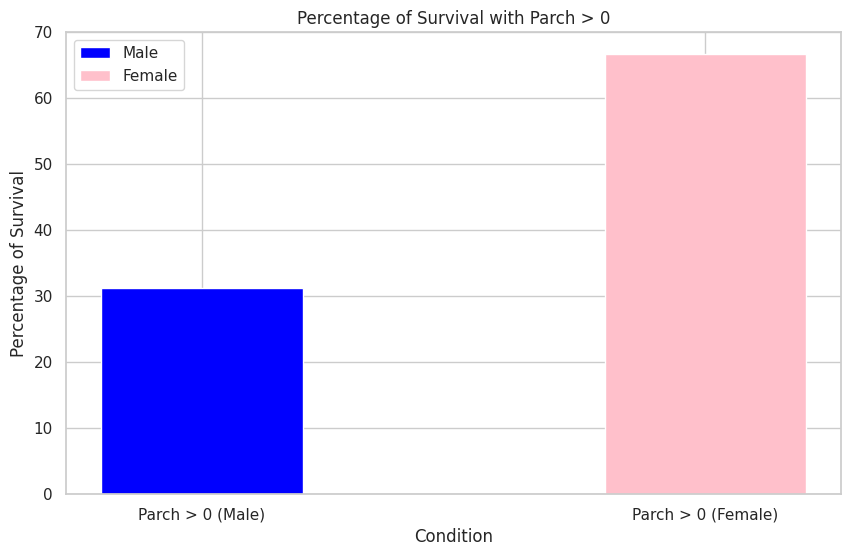

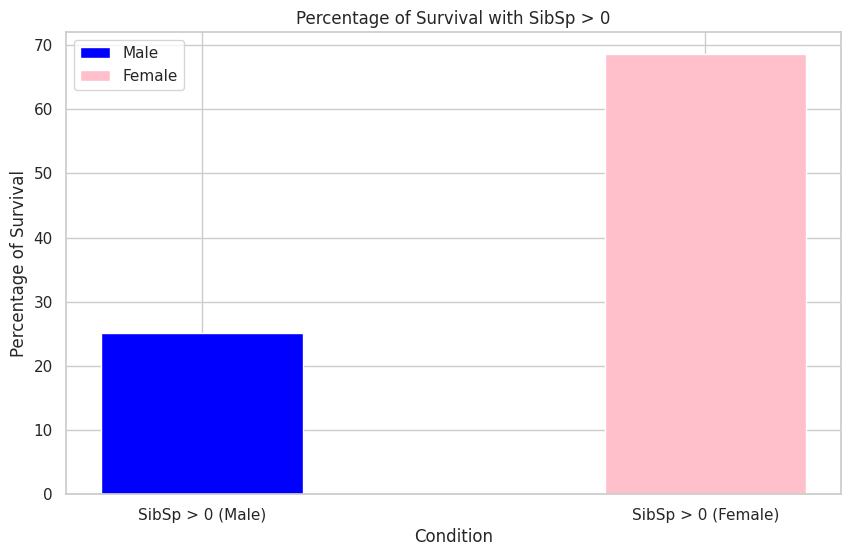

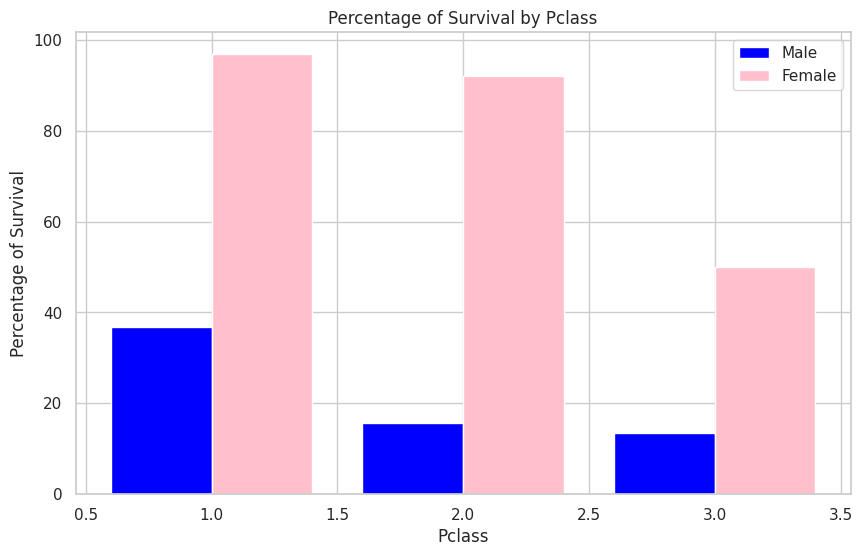

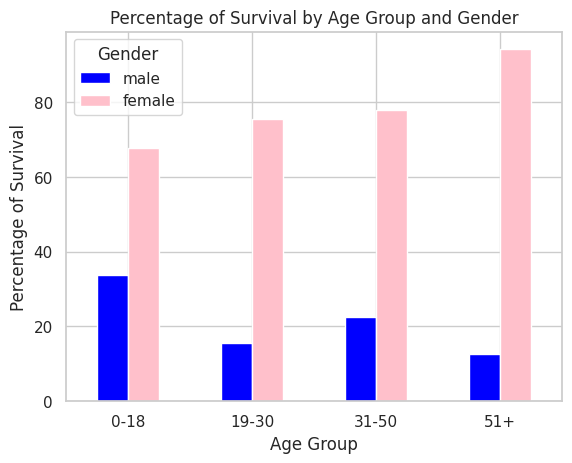

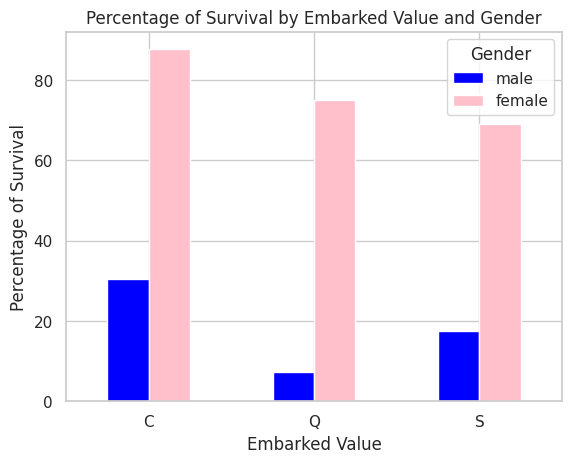

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Define a function to calculate the percentage of survival
def calculate_survival_percentage(data):
    total_passengers = data.shape[0]
    survived_passengers = data[data['Survived'] == 1].shape[0]
    survival_percentage = (survived_passengers / total_passengers) * 100
    return survival_percentage

# Plot the percentage of survival based on Parch > 0 for both genders
fig, ax = plt.subplots(figsize=(10, 6))
parch_gt0_data_male = titanic_data[(titanic_data['Parch'] > 0) & (titanic_data['Sex'] == 'male')]
parch_gt0_data_female = titanic_data[(titanic_data['Parch'] > 0) & (titanic_data['Sex'] == 'female')]
parch_gt0_survival_percentage_male = calculate_survival_percentage(parch_gt0_data_male)
parch_gt0_survival_percentage_female = calculate_survival_percentage(parch_gt0_data_female)
ax.bar('Parch > 0 (Male)', parch_gt0_survival_percentage_male, color='blue', width=0.4, label='Male')
ax.bar('Parch > 0 (Female)', parch_gt0_survival_percentage_female, color='pink', width=0.4, label='Female')
plt.title('Percentage of Survival with Parch > 0')
plt.xlabel('Condition')
plt.ylabel('Percentage of Survival')
plt.legend()
plt.show()

# Plot the percentage of survival based on SibSp > 0 for both genders
fig, ax = plt.subplots(figsize=(10, 6))
sibsp_gt0_data_male = titanic_data[(titanic_data['SibSp'] > 0) & (titanic_data['Sex'] == 'male')]
sibsp_gt0_data_female = titanic_data[(titanic_data['SibSp'] > 0) & (titanic_data['Sex'] == 'female')]
sibsp_gt0_survival_percentage_male = calculate_survival_percentage(sibsp_gt0_data_male)
sibsp_gt0_survival_percentage_female = calculate_survival_percentage(sibsp_gt0_data_female)
ax.bar('SibSp > 0 (Male)', sibsp_gt0_survival_percentage_male, color='blue', width=0.4, label='Male')
ax.bar('SibSp > 0 (Female)', sibsp_gt0_survival_percentage_female, color='pink', width=0.4, label='Female')
plt.title('Percentage of Survival with SibSp > 0')
plt.xlabel('Condition')
plt.ylabel('Percentage of Survival')
plt.legend()
plt.show()

# Plot the percentage of survival for each Pclass for both genders
fig, ax = plt.subplots(figsize=(10, 6))
pclass_survival_percentage_male = titanic_data[titanic_data['Sex'] == 'male'].groupby('Pclass')['Survived'].mean() * 100
pclass_survival_percentage_female = titanic_data[titanic_data['Sex'] == 'female'].groupby('Pclass')['Survived'].mean() * 100
ax.bar(pclass_survival_percentage_male.index - 0.2, pclass_survival_percentage_male, color='blue', width=0.4, label='Male')
ax.bar(pclass_survival_percentage_female.index + 0.2, pclass_survival_percentage_female, color='pink', width=0.4, label='Female')
plt.title('Percentage of Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Percentage of Survival')
plt.xticks(rotation=0)
plt.legend()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Define a function to calculate the percentage of survival
def calculate_survival_percentage(data):
    total_passengers = data.shape[0]
    survived_passengers = data[data['Survived'] == 1].shape[0]
    survival_percentage = (survived_passengers / total_passengers) * 100
    return survival_percentage

# Plot the percentage of survival for each age group (assuming age groups are predefined)
# Calculate age groups based on predefined ranges
age_groups = pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
age_group_survival_percentage = titanic_data.groupby([age_groups, 'Sex'])['Survived'].mean() * 100
age_group_survival_percentage = age_group_survival_percentage.unstack()[['male', 'female']]  # Reorder columns
age_group_survival_percentage.plot(kind='bar', color=['blue', 'pink'])
plt.title('Percentage of Survival by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Survival')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

# Plot the percentage of survival for each embarked value (limited to 1, 2, and 3)
embarked_survival_percentage = titanic_data.groupby(['Embarked', 'Sex'])['Survived'].mean() * 100
embarked_survival_percentage = embarked_survival_percentage.unstack()[['male', 'female']]  # Reorder columns
embarked_survival_percentage.plot(kind='bar', color=['blue', 'pink'])
plt.title('Percentage of Survival by Embarked Value and Gender')
plt.xlabel('Embarked Value')
plt.ylabel('Percentage of Survival')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()
